<a href="https://colab.research.google.com/github/MarcosVel/Deep-Learning/blob/master/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Para desenvolver um modelo de Aprendizado de Máquina com o conjunto de dados CIFAR-10, você pode seguir os seguintes passos:

1. Importe as bibliotecas necessárias, incluindo TensorFlow, Keras e o conjunto de dados CIFAR-10.

2. Carregue o conjunto de dados CIFAR-10 usando a função load_data() do Keras. Isso fornecerá as imagens de treinamento e teste, bem como suas respectivas etiquetas.

3. Pré-processe os dados convertendo as imagens em tensores e normalizando-os para valores entre 0 e 1.

4. Defina a arquitetura do modelo. Você pode usar uma variedade de camadas, como convolucionais, de pooling e totalmente conectadas, para construir seu modelo. Certifique-se de usar camadas de dropout para ajudar a prevenir o overfitting.

5. Compile o modelo, definindo a função de perda, o otimizador e as métricas de avaliação.

6. Treine o modelo usando o método fit() do Keras, passando as imagens de treinamento e suas etiquetas correspondentes.

7. Avalie o desempenho do modelo em um conjunto de dados de teste separado, usando o método evaluate().

8. Faça previsões usando o método predict() do modelo em novos dados.

### 1. Import librarys

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
print(tf.__version__)

2023-03-31 19:40:35.502860: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-31 19:40:35.532466: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 19:40:36.005218: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


### 2. Load data


In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 3. Normalizing

In [ ]:
# normalizing the data between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (50000, 32, 32, 3)


In [ ]:
y_train, y_test = y_train.flatten(), y_test.flatten()
print("y_train.shape:", y_train.shape)

y_train.shape: (50000,)


In [ ]:
k = len(set(y_train))
print("number of classes:", k)

number of classes: 10


### 4. Build and compile the model

The code will define a Convolutional Neural Network (CNN) model to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The goal of the model is to take an image as input and output a probability distribution over the 10 classes.


In [ ]:
# Let's go through the code step by step:

# Define a new input with the same shape as a single image in the CIFAR-10 dataset
i = Input(shape=x_train[0].shape)
''' Here, the Input function from the Keras library is used to create a placeholder for the input images to the model.
The shape argument is set to the shape of the first image in the training dataset (x_train[0].shape).
This creates a placeholder of the appropriate size to handle any image in the dataset.'''

# Add a 2D convolutional layer with 32 filters, a 3x3 kernel, and a stride of 2
# The ReLU activation function is used to introduce non-linearity
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
''' This line of code defines the first convolutional layer of the model. 
Conv2D is a function from the Keras library that creates a convolutional layer
with the specified number of filters (in this case, 32), a 3x3 kernel size, and a stride of 2. 
The activation argument is set to 'relu', which stands for rectified linear unit. 
This activation function introduces non-linearity into the model, 
allowing it to learn more complex patterns in the input data.'''

x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
''' This line defines the second convolutional layer of the model, 
using the output tensor x from the previous convolutional layer as its input.'''

x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
''' This line defines the third convolutional layer of the model, 
using the output tensor x from the previous convolutional layer as its input.'''

# Flatten the output of the convolutional layers to a 1D tensor
x = Flatten()(x)
'''This line flattens the output tensor of the third convolutional layer into a 1D vector.
This is necessary because the fully connected dense layers of the model require a 1D input.'''

# Apply dropout regularization to the 1D tensor to prevent overfitting
# A dropout rate of 0.2 is used, meaning that 20% of the nodes will be randomly set to 0 during each training iteration
x = Dropout(0.2)(x)

# Add a fully connected dense layer with 512 units and a ReLU activation function
# The output tensor x from the previous layer is used as input to this layer.
x = Dense(512, activation='relu')(x)

# Apply dropout regularization to the output of the dense layer
x = Dropout(0.2)(x)

# Add a final dense layer with k units and a softmax activation function, where k is the number of classes in the dataset
x = Dense(k, activation='softmax')(x)
'''The k value is set to 10, which is the number of classes in the CIFAR-10 dataset. 
The softmax activation function outputs a probability distribution over the classes, 
with each value in the output vector representing the probability that the input image belongs to that class.'''

# Define a new model with the input and output tensors
model = Model(i, x)
'''This line creates the final Keras Model object by specifying the input and output tensors of the model.
i is the input tensor and x is the output tensor.
This object can then be used to train and evaluate the model on the CIFAR-10 dataset, 
using functions such as model.compile(), model.fit(), and model.evaluate().'''

2023-03-31 19:40:50.802460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-31 19:40:50.818442: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


'This line creates the final Keras Model object by specifying the input and output tensors of the model.\ni is the input tensor and x is the output tensor.\nThis object can then be used to train and evaluate the model on the CIFAR-10 dataset, \nusing functions such as model.compile(), model.fit(), and model.evaluate().'

### 5. Compile

In [ ]:
# compile defining the loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 6. Train the model

In [ ]:
# fit the model to the training data
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 3ms/step - loss: 1.5275 - accuracy: 0.4442 - val_loss: 1.3092 - val_accuracy: 0.5272
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2056 - accuracy: 0.5706 - val_loss: 1.0923 - val_accuracy: 0.6070
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0481 - accuracy: 0.6307 - val_loss: 1.0009 - val_accuracy: 0.6445
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9350 - accuracy: 0.6686 - val_loss: 0.9628 - val_accuracy: 0.6585
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8464 - accuracy: 0.7040 - val_loss: 0.8900 - val_accuracy: 0.6871
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7574 - accuracy: 0.7308 - val_loss: 0.8888 - val_accuracy: 0.6909
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6884 - accuracy: 0.7570 - val_loss: 0.8608 - val_accuracy:

### 7. Evaluate the model

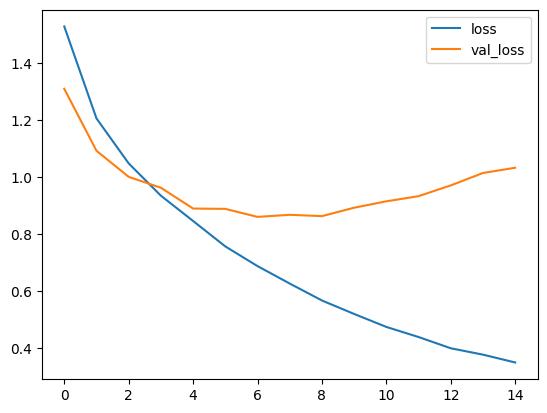

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

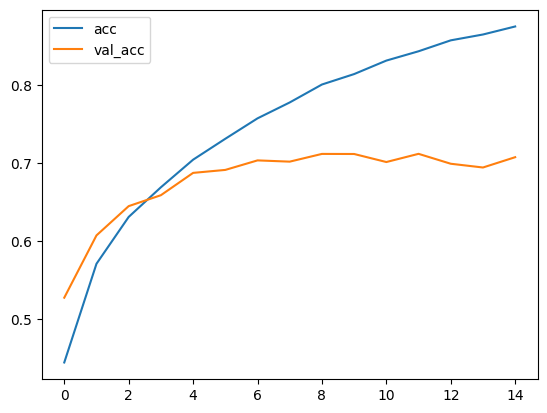

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 1.0328 - accuracy: 0.7072
[1.0328421592712402, 0.7071999907493591]


In [ ]:
print(model.evaluate(x_test, y_test, verbose=2)) 
# what is verbose=2?   
# verbose=0 will show you nothing (silent)      
# verbose=1 will show you an animated progress bar like this: [==============================] - 2s 2ms/step      
# verbose=2 will just mention the number of epoch like this: 1/1 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00

313/313 - 0s - loss: 1.0328 - accuracy: 0.7072 - 331ms/epoch - 1ms/step
[1.0328421592712402, 0.7071999907493591]


### Labels

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_indices = np.unique(y_train).tolist()
class_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
class_names = [f'{labels[i]} ({class_indices[i]})' for i in range(len(class_indices))]
print(class_names)

['airplane (0)', 'automobile (1)', 'bird (2)', 'cat (3)', 'deer (4)', 'dog (5)', 'frog (6)', 'horse (7)', 'ship (8)', 'truck (9)']


### Confusion matrix

In [ ]:
# predict the test data
p_test = model.predict(x_test).argmax(axis=1)

# confusion matrix
cm = confusion_matrix(y_test, p_test)
print(cm)

313/313 [==============================] - 0s 997us/step
[[788  16  54  15  25   2   7  11  55  27]
 [ 25 832  10  10   3   4   7   4  24  81]
 [ 66   5 617  56 112  47  50  30  10   7]
 [ 25  13  82 477  98 149  74  44  10  28]
 [ 30   2  55  37 733  25  46  60   8   4]
 [ 16   8  70 202  56 542  31  55   8  12]
 [  7   8  54  56  61  32 760   6   7   9]
 [ 19   5  43  28  62  59   7 760   4  13]
 [ 74  39  14  14  16   5   6   6 803  23]
 [ 50 103  14  10  10  10   6  16  21 760]]


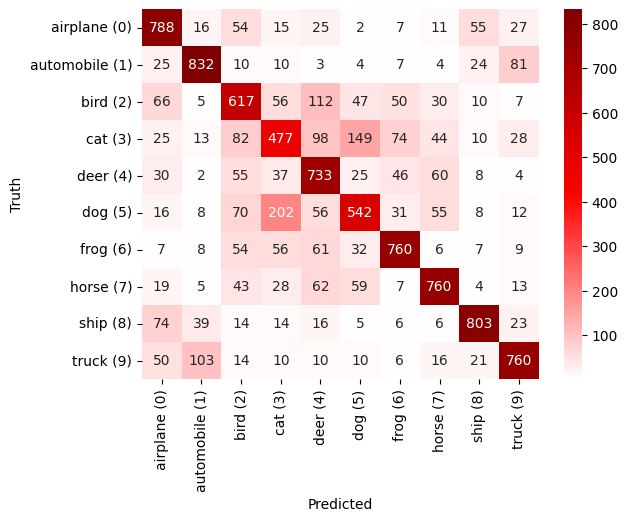

In [ ]:
# plot the confusion matrix with seaborn
# plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='seismic', center=0, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

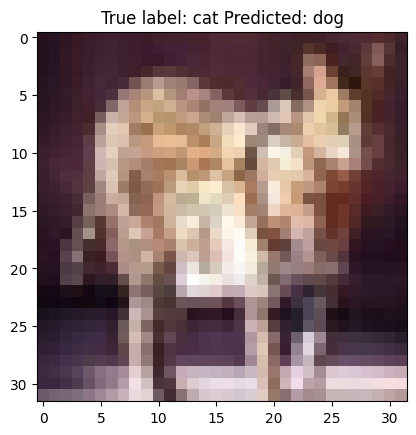

In [ ]:
# show some misclassidied examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));